# Elman Neural Networks
Elman神经网络是一种流行的部分递归神经网络。它们最初被设计为学习顺序或时间变化的模式，并已成功地用于模式分类、控制、优化。

它们由一个输入层、一个上下文层（也叫循环层或延迟层，见图6.1）、一个隐藏层和一个输出层组成。每一层都包含一个或多个神经元，它们通过计算其输入的加权和的非线性函数，将信息从一层传播到另一层。

在Elman神经网络中，上下文层的神经元数量等于隐藏层的神经元数量。此外，上下文层的神经元与隐藏层的所有神经元完全连接。

类似于普通的前馈神经网络，神经元之间所有连接的强度由一个权重决定。最初，所有的权重值都是随机选择的，并在训练过程中进行优化。

记忆是通过延迟（上下文）单元发生的，延迟单元由隐藏层神经元供给。从隐藏层到延迟单元的递归连接的权重固定为1，这导致延迟单元始终保持着隐藏单元先前值的副本。

In [1]:
%%html
<img src='Elman Neural Networks.png'> 

## Prepare You Data for Easy Use

In [2]:
import numpy as np
import pandas as pd
loc= "update_COE.csv"
temp = pd.read_csv(loc)
data = temp.drop(temp.columns[[0,1]], axis=1)
y=data['COE$']
x=data.drop(data.columns[[0,4]], axis =1)#drop the first line
x=x.apply(np.log)
x=pd.concat([x, data['Open?']], axis =1)
from sklearn import preprocessing
scaler_x = preprocessing.MinMaxScaler(feature_range=(0,1))
x = np.array(x).reshape(len(x),4)
x = scaler_x.fit_transform(x)
scaler_y = preprocessing.MinMaxScaler(feature_range=(0,1))
y = np.array(y).reshape(len(y),1)
y = np.log(y)
y = scaler_y.fit_transform(y)
y = y.tolist()
x = x.tolist()

In [3]:
from pyneurgen.neuralnet import NeuralNet
from pyneurgen.recurrent import ElmanSimpleRecurrent

In [4]:
import random
random.seed(2020)
fit1 = NeuralNet()
input_nodes = 4
hidden_nodes = 7
output_nodes = 1
fit1.init_layers(input_nodes, [hidden_nodes], output_nodes, ElmanSimpleRecurrent())
fit1.randomize_network()
fit1.layers[1].set_activation_type('sigmoid')
fit1.set_learnrate(0.05)
fit1.set_all_inputs(x)
fit1.set_all_targets(y)

在上面的代码中，隐藏节点使用了sigmoid激活函数，学习率设置为5%。这意味着在训练过程中，目标和输出的每个实例之间的5%的误差将被回传到网络中。

## Exploring the Error Surface

神经网络模型有很多权重，其数值必须是 被确定为产生一个最优解。输出为 输入的函数很可能是高度非线性的，这就意味着 使得优化过程变得复杂。寻找全局的 避免局部最小值的最优解是一个挑战，因为...。误差函数一般既不凸也不凹。这个 意味着所有二次偏导数的矩阵（通常为 称为黑森）既不是正半定式，也不是负半定型。这一观察的实际后果是，神经网络会卡在局部最小值，这取决于误差面的形状。

为了使其类似于一元函数，请注意sin(x)既不是凸的也不是凹的。它有无限多的最大值和最小值，见图 6.4（上图）。而$x^2$只有一个最小值，$-x^2$只有一个最大值，见图6.4（下图）。这一观察的实际后果是，根据误差面的形状，神经网络可能会卡在局部最小值。

In [5]:
%%html
<img src='one variable.png'> 

如果你绘制神经网络误差作为权重的函数，你很可能会看到一个非常粗糙的表面，有许多局部最小值。如图6.5所示，它可以有非常多的峰和谷。它可能在某些方向上是高度弯曲的，而在其他方向上是平坦的。这使得优化过程非常复杂。

In [6]:
%%html
<img src='error surface.png'> 

## A Super Simple Way to Fit the Model
设置训练集包含大约95%的样本

In [7]:
length = len(x)
learn_end_point = int(length * 0.95)
fit1.set_learn_range(0, learn_end_point)
fit1.set_test_range(learn_end_point + 1, length -1)

In [8]:
fit1.learn( epochs=100, show_epoch_results=True, random_testing=False )

epoch: 0 MSE: 0.0042833444963159715
epoch: 1 MSE: 0.0031433628547304156
epoch: 2 MSE: 0.0027620395885732175
epoch: 3 MSE: 0.0024875174600026513
epoch: 4 MSE: 0.002289141691456433
epoch: 5 MSE: 0.0021462646845147163
epoch: 6 MSE: 0.0020444657082606286
epoch: 7 MSE: 0.001973357990189264
epoch: 8 MSE: 0.0019252691405631068
epoch: 9 MSE: 0.0018944191152227643
epoch: 10 MSE: 0.0018763902671283662
epoch: 11 MSE: 0.0018677736561625161
epoch: 12 MSE: 0.0018659246676334372
epoch: 13 MSE: 0.001868788413716585
epoch: 14 MSE: 0.0018747711102714438
epoch: 15 MSE: 0.0018826427808152477
epoch: 16 MSE: 0.001891462052855012
epoch: 17 MSE: 0.0019005170570482988
epoch: 18 MSE: 0.0019092784174235917
epoch: 19 MSE: 0.0019173615510001672
epoch: 20 MSE: 0.0019244962798006574
epoch: 21 MSE: 0.0019305022740554174
epoch: 22 MSE: 0.0019352691961471952
epoch: 23 MSE: 0.0019387406619840175
epoch: 24 MSE: 0.0019409013167793123
epoch: 25 MSE: 0.0019417664579766904
epoch: 26 MSE: 0.0019413737430933236
epoch: 27 MSE: 

In [9]:
mse = fit1.test()
np.round(mse, 6)

0.000101

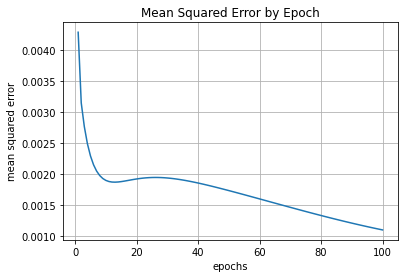

In [10]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(fit1.accum_mse) + 1, 1), fit1.accum_mse)
plt.xlabel('epochs')
plt.ylabel('mean squared error')
plt.grid(True)
plt.title("Mean Squared Error by Epoch")
fig = plt.gcf()
plt.show()

In [11]:
# 测试实际值
test_reals = data['COE$'][learn_end_point + 1:length].tolist()
print("test_reals are (时间长度为%d):" % len(test_reals))
print(test_reals)

test_reals are (时间长度为13):
[10803.0, 11101.0, 12699.0, 13605.0, 15200.0, 14900.0, 13000.0, 12605.0, 14156.0, 14501.0, 14669.0, 13499.0, 13301.0]


In [13]:
# 模型反归一化变换得到真实际值
retrieved_reals = [np.exp(
        scaler_y.inverse_transform(
            np.array(item).reshape(-1, 1)
        ))[0][0] for item in fit1.test_targets_activations]
print("retrieved_reals are(时间长度为%d):" % len(retrieved_reals))
print(retrieved_reals)

retrieved_reals are(时间长度为12):
[10802.999999999998, 11100.99999999999, 12699.000000000002, 13604.999999999989, 15200.000000000007, 14899.999999999967, 12999.99999999999, 12605.0, 14156.000000000004, 14501.000000000004, 14668.999999999995, 13499.000000000004]


In [14]:
# 模型对价格的预测值
forecast = [np.exp(
        scaler_y.inverse_transform(
            np.array(item).reshape(-1, 1)
        ))[1][0] for item in fit1.test_targets_activations]
print("forecasts are(时间长度为%d):" % len(forecast))
print(forecast)

forecasts are(时间长度为12):
[11924.281423096756, 12012.386772439017, 11984.091697191016, 13706.815043076036, 14239.07366543469, 14984.519095189391, 13829.136472938235, 13244.7378625037, 12793.988464541584, 13707.483251629094, 13503.46902467294, 12831.108866060735]


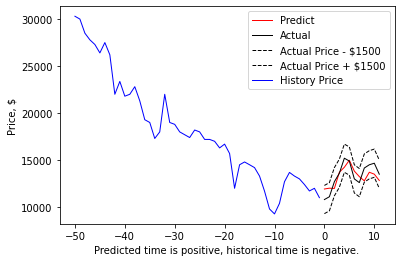

In [16]:
real = np.array(data['COE$']).reshape(-1)
history_time_length = 50
ahead = 12
plt.plot(range(0, ahead), forecast, '-r', label=u"Predict", linewidth=1)
plt.plot(range(0, ahead), test_reals[0:ahead], color='black', label=u"Actual", linewidth=1)
plt.plot(range(0, ahead), np.array(test_reals[0:ahead]) - 1500, '--k',
             label=u"Actual Price - $1500", linewidth=1)
plt.plot(range(0, ahead), np.array(test_reals[0:ahead]) + 1500, '--k',
             label=u"Actual Price + $1500", linewidth=1)
plt.plot(range(-history_time_length, 0),
             real[len(real) - ahead - history_time_length - 1: len(real) - ahead - 1], '-b', label=u"History Price", linewidth=1)
plt.xlabel(u"Predicted time is positive, historical time is negative.")
plt.ylabel(u"Price, $")
plt.legend()
fig = plt.gcf()
plt.show()